In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist#载入mnist数据集
from tensorflow.keras.callbacks import TensorBoard#导入tensorboard
from tensorflow.keras.models import Sequential#导入Sequential，构建神经网络
from tensorflow.keras.layers import LSTM,Dense,Dropout,Flatten
from sklearn.preprocessing import StandardScaler#导入StandardScaler进行数据预处理,归一化处理
import matplotlib.pyplot as plt

0


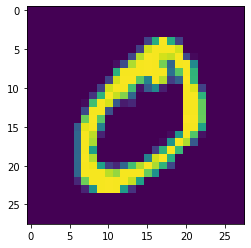

In [10]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()#数据加载,                                                    
scalar = StandardScaler()
plt.imshow(x_train[1])
print(y_train[1])



x_train表示训练数据集，y_train表示训练数据集对应的结果；x_test表示测试数据集，y_test表示测试集对应的结果

In [11]:
#对数据进行归一化处理，tf.keras.utils.normalize是L2范数下的normalize
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
#构建神经网络层
model = Sequential()
# model.add(Flatten())#Flatten层用来将输入“压平”，即把多维的输入一维化
model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.6045 - accuracy: 0.8001
Epoch 2/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1543 - accuracy: 0.9551
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1114 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0846 - accuracy: 0.9756
Epoch 5/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0702 - accuracy: 0.9795


In [13]:
val_loss,val_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0980 - accuracy: 0.9712


In [14]:
predictions = model.predict([x_test[1111]])
print(predictions)
plt.imshow(x_test[1111])


ValueError: in user code:

    File "e:\anaconda\envs\tensorflow-gpu\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "e:\anaconda\envs\tensorflow-gpu\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\anaconda\envs\tensorflow-gpu\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "e:\anaconda\envs\tensorflow-gpu\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "e:\anaconda\envs\tensorflow-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "e:\anaconda\envs\tensorflow-gpu\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_1" (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 28)
    
    Call arguments received by layer "sequential_1" (type Sequential):
      • inputs=('tf.Tensor(shape=(None, 28), dtype=float32)',)
      • training=False
      • mask=None
